`This notebook shows how to compute the linear and non-linear power spectra with PyCosmo's fitting functions`

In [1]:
import PyCosmo
import numpy as np

# Comment out this line to remove the Watermark
from Functions import pycosmowatermark

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from Functions.extra_functions import deltanorm

## PyCosmo setup

In [9]:
# PyCosmo instance
cosmo = PyCosmo.build()

[main]
model = LCDM
core_equations_files = ['/mnt/c/Users/kitty/pycosmo_environment/lib/python3.11/site-packages/PyCosmo/CosmologyCore.py']
compilation_flags = -O3
default_ini_file = config/default_lcdm.ini

[equation_parameters]
l_max = 20
splits = None
reorder = True
cache hit at /home/kitty/_cache/PyCosmo/linux-x86_64/2_2_0/2_2_4__1f1046.pkl
load wrapper from /home/kitty/_cache/sympy2c/linux-x86_64/2_2_4__np_1_26_4/1db8b055_fc3ec


## Linear and non-linear power spectrum computed with different fitting functions 

`The available linear fitting functions are 'EH' and 'BBKS'. For the non-linear fitting function, the user can choose between 'halofit' and its revised version, 'rev_halofit'. `

In [5]:
z = 1.5
k = np.logspace(-3,3,1000)

In [10]:
# Set the linear and non-linear fitting function
cosmo.set(pk_type = 'EH', 
          pk_nonlin_type = 'rev_halofit')

Parameters updated


In [11]:
# Compute the linear and non-linear power spectra 
pk_lin_EH = cosmo.lin_pert.powerspec_a_k(1./(1+z), k)[:,0]
pk_nonlin_EH = cosmo.nonlin_pert.powerspec_a_k(1./(1+z), k)[:,0]

In [15]:
# Change the linear fitting function to BBKS
cosmo.set(pk_type = 'BBKS',
          omega_b = 0.0,
          omega_m = 0.5)

Parameters updated


In [16]:
# Compute the linear and non-linear power spectra 
pk_lin_BBKS = cosmo.lin_pert.powerspec_a_k(1./(1+z), k)[:,0]
pk_nonlin_BBKS = cosmo.nonlin_pert.powerspec_a_k(1./(1+z), k)[:,0]

AttributeError: 'XTick' object has no attribute 'label'

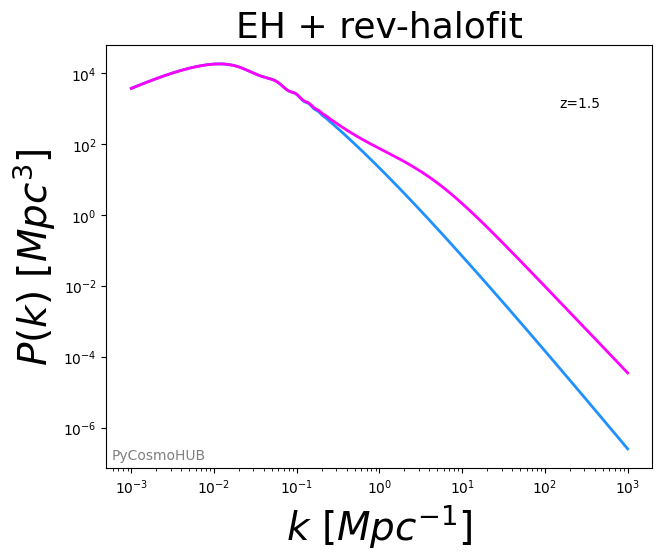

In [17]:
# Plot the results

fig = plt.figure(figsize=(15.5, 5.5))

plt.subplot(1, 2, 1)
ax = plt.gca()
ax.loglog(k, pk_lin_EH, color='dodgerblue', linewidth = 2, label = 'linear')
ax.loglog(k, pk_nonlin_EH, color='magenta', linewidth = 2, label = 'non-linear')
ax.set_xlabel(r'$k \ [Mpc^{-1}]$', fontsize=28)
ax.set_ylabel(r'$P(k) \ [Mpc^{3}]$', fontsize=28)
plt.title('EH + rev-halofit', fontsize = 26)
ax.text(150, 1100, 'z=1.5')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24) 
    tick.label.set_fontweight('black')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24) 
    tick.label.set_fontweight('black')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
ax = plt.gca()
ax.loglog(k, pk_lin_BBKS, color='forestgreen', linewidth = 2, label = 'linear')
ax.loglog(k, pk_nonlin_BBKS, color='crimson', linewidth = 2, label = 'non-linear')
ax.set_xlabel(r'$k \ [Mpc^{-1}]$', fontsize=28)
plt.title('BBKS + rev-halofit', fontsize = 26)
ax.text(150, 1100, 'z=1.5')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24) 
    tick.label.set_fontweight('black')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24) 
    tick.label.set_fontweight('black')
plt.legend(loc='best')  
plt.show()

## Non-linear power spectrum computed with the model from the HMCode

# Set the linear fitting function to EH and the non-linear to 'mead'
cosmo.set(pk_type = 'EH', pk_nonlin_type = 'mead')

In [18]:
pk_nonlin_hmcode = cosmo.nonlin_pert.powerspec_a_k(1./(1+z), k)[:,0]

AttributeError: 'XTick' object has no attribute 'label'

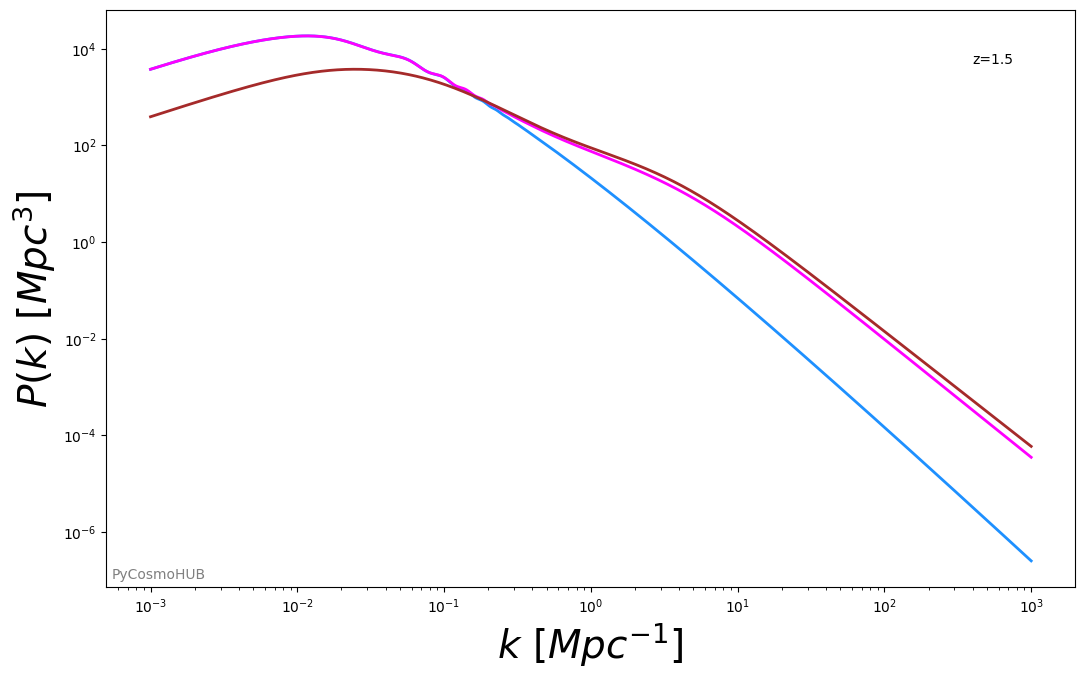

In [19]:
fig = plt.figure(figsize=(12.5, 7.5))
ax = plt.gca()
ax.loglog(k, pk_lin_EH, color='dodgerblue', linewidth = 2, label = 'linear')
ax.loglog(k, pk_nonlin_EH, color='magenta', linewidth = 2, label = 'non-linear rev-halofit')
ax.loglog(k, pk_nonlin_hmcode, color='brown', linewidth = 2, label = 'non-linear HMCode')
ax.set_xlabel(r'$k \ [Mpc^{-1}]$', fontsize=28)
ax.set_ylabel(r'$P(k) \ [Mpc^{3}]$', fontsize=28)
ax.text(400, 5000, 'z=1.5')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24) 
    tick.label.set_fontweight('black')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24) 
    tick.label.set_fontweight('black')
plt.legend(loc='best')
plt.show()